In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# Data loading and transformation
transform = transforms.ToTensor()

root = '\\Users\\jayanthkoduri\\OneDrive\\Desktop\\New folder\\deep learning'
train_data_set = datasets.MNIST(root=root, train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root=root, train=False, download=True, transform=transform)

train_loader = DataLoader(train_data_set, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data_set, batch_size=10, shuffle=False)


100%|███████████████████████████| 9912422/9912422 [00:00<00:00, 11133814.31it/s]


Extracting \Users\jayanthkoduri\OneDrive\Desktop\New folder\deep learning/MNIST/raw/train-images-idx3-ubyte.gz to \Users\jayanthkoduri\OneDrive\Desktop\New folder\deep learning/MNIST/raw



100%|███████████████████████████████| 28881/28881 [00:00<00:00, 16512499.16it/s]

Extracting \Users\jayanthkoduri\OneDrive\Desktop\New folder\deep learning/MNIST/raw/train-labels-idx1-ubyte.gz to \Users\jayanthkoduri\OneDrive\Desktop\New folder\deep learning/MNIST/raw




100%|███████████████████████████| 1648877/1648877 [00:00<00:00, 10900093.61it/s]


Extracting \Users\jayanthkoduri\OneDrive\Desktop\New folder\deep learning/MNIST/raw/t10k-images-idx3-ubyte.gz to \Users\jayanthkoduri\OneDrive\Desktop\New folder\deep learning/MNIST/raw



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 3692678.57it/s]

Extracting \Users\jayanthkoduri\OneDrive\Desktop\New folder\deep learning/MNIST/raw/t10k-labels-idx1-ubyte.gz to \Users\jayanthkoduri\OneDrive\Desktop\New folder\deep learning/MNIST/raw



In [3]:
# Model definitions
class ConvolNetwork(nn.Module):
    def __init__(self, conv_layers, fc_layers):
        super().__init__()
        self.conv_layers = nn.ModuleList(conv_layers)
        self.fc_layers = nn.ModuleList(fc_layers)

    def forward(self, x):
        for conv in self.conv_layers:
            x = F.relu(conv(x))
            x = F.max_pool2d(x, 2, 2)
        x = torch.flatten(x, 1)
        for i, fc in enumerate(self.fc_layers):
            x = F.relu(fc(x)) if i < len(self.fc_layers) - 1 else fc(x)
        return F.log_softmax(x, dim=1)

In [4]:
# Instantiating models
model1_layers = [nn.Conv2d(1, 8, 3, 1), nn.Conv2d(8, 18, 3, 1)]
model1_fc = [nn.Linear(5*5*18, 18), nn.Linear(18, 10)]
model1 = ConvolNetwork(model1_layers, model1_fc)

model2_layers = [nn.Conv2d(1, 6, 4, 1), nn.Conv2d(6, 16, 4, 1)]
model2_fc = [nn.Linear(4*4*16, 16), nn.Linear(16, 14), nn.Linear(14, 10)]
model2 = ConvolNetwork(model2_layers, model2_fc)

In [5]:
# Training and evaluation function
def train_and_evaluate(model, train_loader, test_loader, epochs=20):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    train_losses, test_losses, train_correct, test_correct = [], [], [], []

    for epoch in range(epochs):
        model.train()
        train_loss, train_corr = 0, 0
        for x_train, y_train in train_loader:
            y_pred = model(x_train)
            loss = criterion(y_pred, y_train)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_corr += (y_pred.argmax(1) == y_train).sum().item()

        train_losses.append(train_loss / len(train_loader))
        train_correct.append(train_corr)

        model.eval()
        test_loss, test_corr = 0, 0
        with torch.no_grad():
            for x_test, y_test in test_loader:
                y_val = model(x_test)
                loss = criterion(y_val, y_test)
                test_loss += loss.item()
                test_corr += (y_val.argmax(1) == y_test).sum().item()
        test_losses.append(test_loss / len(test_loader))
        test_correct.append(test_corr)

    return train_losses, test_losses, train_correct, test_correct

In [6]:
# Run training and evaluation
results1 = train_and_evaluate(model1, train_loader, test_loader)
results2 = train_and_evaluate(model2, train_loader, test_loader)

In [7]:
# Visualization
def plot_results(results, label):
    train_losses, test_losses, train_correct, test_correct = results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label=f'Training Loss {label}')
    plt.plot(test_losses, label=f'Test Loss {label}')
    plt.title('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot([t/600 for t in train_correct], label=f'Training Accuracy {label}')
    plt.plot([t/100 for t in test_correct], label=f'Test Accuracy {label}')
    plt.title('Accuracy')
    plt.legend()
    plt.show()


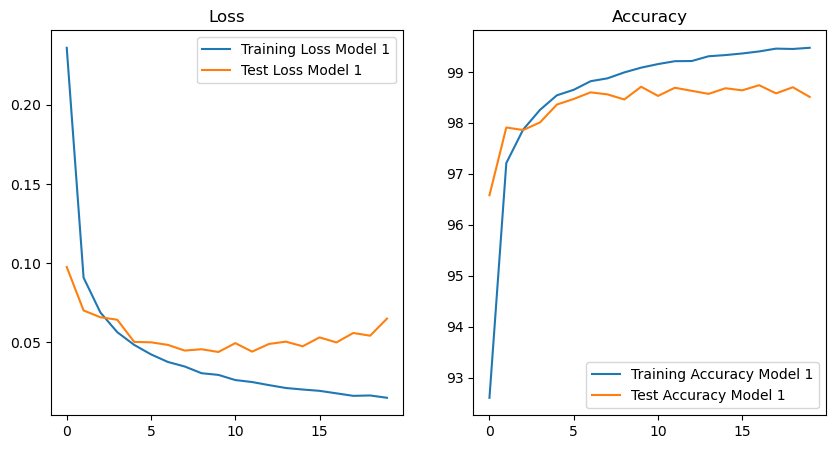

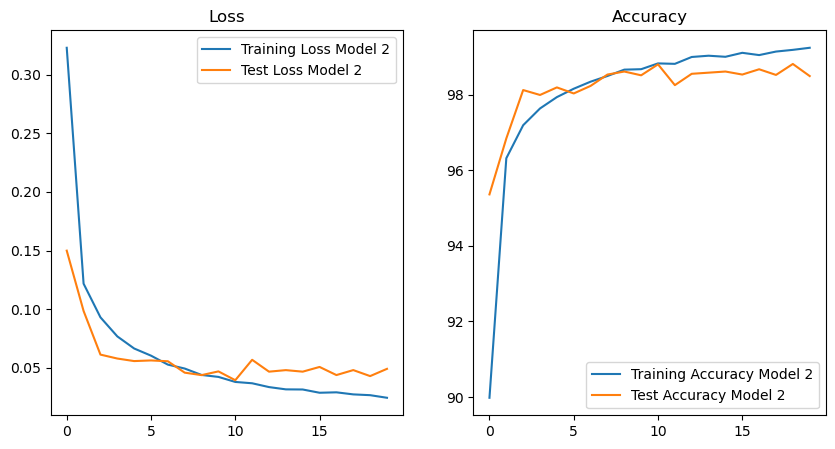

In [8]:
plot_results(results1, 'Model 1')
plot_results(results2, 'Model 2')